# Dang Thanh Vu - 197796

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from scipy import stats

def random_MixtureGaussian(N, P, m, S, cl):
    d = m.shape[1]
    c = m.shape[0]
    z = np.random.choice(np.arange(0,c), N, p=P)
    X = np.ones([1,d])
    for i in range(0,c):
        n = np.sum(z == np.array([i]*N))
        x = np.random.multivariate_normal(m[i], S[i], n)
        X = np.concatenate([X, x])
    X = X[1:]
    Y = cl*np.array(N*[1])
    return X, Y

def t_test(S1, S2, p_value):
    n1 = S1.shape[0]
    n2 = S2.shape[0]
    m1 = np.mean(S1)
    m2 = np.mean(S2)
    var1 = n1*np.var(S1)/(n1-1)
    var2 = n2*np.var(S2)/(n2-1)
    t_value = (m1 - m2)/(np.sqrt(var1/n1 + var2/n2))
    df = n1 + n2 - 2
    p = 1 - stats.t.cdf(t_value, df=df)
    return 2*p, 2*p < p_value

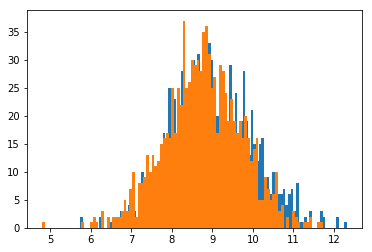

In [2]:
m1 = np.array([[9]])
m2 = np.array([[8.75]])
S = np.array([[[1]]])
N = 1000
P = np.array([1])
S1, Y1 = random_MixtureGaussian(N, P, m1, S, 0)
S2, Y2 = random_MixtureGaussian(N, P, m2, S, 1)
plt.hist(S1[:, 0], bins=100)
plt.hist(S2[:, 0], bins=100)
plt.show()

In [3]:
p, test = t_test(S1[:, 0], S2[:, 0], 0.05)
print("Reject H_0: ", test, " because p = ", p)
t2, p2 = stats.ttest_ind(S1[:, 0], S2[:, 0])

Reject H_0:  True  because p =  2.3444677532680203e-08


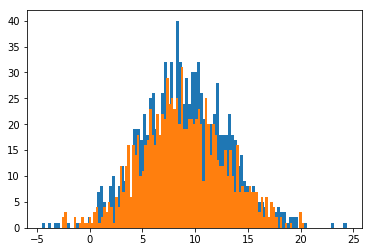

In [4]:
m1 = np.array([[9]])
m2 = np.array([[8.75]])
S = np.array([[[16]]])
N = 1000
P = np.array([1])
S1, Y1 = random_MixtureGaussian(N, P, m1, S, 0)
S2, Y2 = random_MixtureGaussian(N, P, m2, S, 1)
plt.hist(S1[:, 0], bins=100)
plt.hist(S2[:, 0], bins=100)
plt.show()

In [5]:
p, test = t_test(S1[:, 0], S2[:, 0], 0.05)
print("Reject H_0: ", test, " because p = ", p)

Reject H_0:  False  because p =  0.2776484655192375


In [6]:
t2, p2 = stats.ttest_ind(S1[:, 0], S2[:, 0])